In [1]:
import requests
import os

# URL of the image you want to download
image_url = 'https://cdn.idntimes.com/content-images/community/2020/09/fromandroid-c30f6ad5678cc950fff0a244e2d5f5a5.jpg'

# Send a GET request to the image URL
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the filename from the URL
    filename = os.path.basename(image_url)

    # Specify the directory where you want to save the image
    save_directory = 'test_image_from_online/'
    os.makedirs(save_directory, exist_ok=True)  # Create the directory if it doesn't exist

    # Combine the directory path and filename to create the full path
    full_path = os.path.join(save_directory, filename)

    # Save the image to the specified directory
    with open(full_path, 'wb') as f:
        f.write(response.content)

    print(f"Image saved to: {full_path}")
else:
    print("Failed to download the image.")

Image saved to: test_image_from_online/fromandroid-c30f6ad5678cc950fff0a244e2d5f5a5.jpg


2024-03-07 22:05:49.007455: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 22:05:49.031355: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 22:05:49.031674: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 22:05:49.032888: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 22:05:49.033127: I external/local_xla/xla/stream_executor

1/1 [==============================] - 4s 4s/step


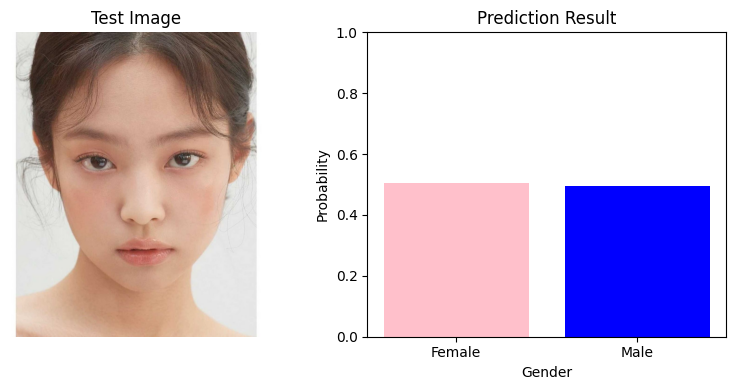

Model predicts: Female


In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved InceptionV3 model
saved_model = load_model("model_saved/experimen-inception-v3-iteration-1.h5")

# Load the image you want to test
img_path = 'test_image_from_online/fromandroid-c30f6ad5678cc950fff0a244e2d5f5a5.jpg' # Ganti dengan path gambar yang ingin Anda uji
img = image.load_img(img_path, target_size=(299, 299)) # Sesuaikan dengan ukuran input InceptionV3
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make the prediction using the saved model
prediction = saved_model.predict(img_array)

# Interpret the prediction result
if prediction[0][0] > 0.5:
 result = "Male"
else:
 result = "Female"

# Display the image and prediction result
plt.figure(figsize=(8, 4))

# Display the image
plt.subplot(1, 2, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title('Test Image')

# Display the prediction result
plt.subplot(1, 2, 2)
plt.bar(['Female', 'Male'], [1 - prediction[0][0], prediction[0][0]], color=['pink', 'blue'])
plt.title('Prediction Result')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.ylim([0, 1])

# Show the plots
plt.tight_layout()
plt.show()

# Print the final result
print(f"Model predicts: {result}")